## Image classification Practical


Question 1: how many classes are in cifar-10? 

Answer:

They are 10 classes

Question 2: is this a colour or greyscale image dataset?

Answer:

This is a colour dataset

Question 3: how many channels/depth should the images have?

Answer:

They should be 3 channels/depth

Question 4: is this a regression or classification problem?

Answer:

This is a classification problem

Question 5: if we one-hot encode the targets for this dataset, what will the dimensions of the resulting vector be?

Answer

The dimension is 60000 by 10

Question 6: which activation function will you most likely use in the last layer of your model for this problem?

Answer:

softmax

In [ ]:
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
np.random.seed(13)
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras import metrics
%matplotlib inline

## Load the dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


## View the shape

In [ ]:
print('Training data shape : ', X_train.shape, Y_train.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)


In [ ]:
print('Testing data shape : ', X_test.shape, Y_test.shape)

Testing data shape :  (10000, 32, 32, 3) (10000, 1)


## Find the unique numbers from the train labels

In [ ]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : [4]')

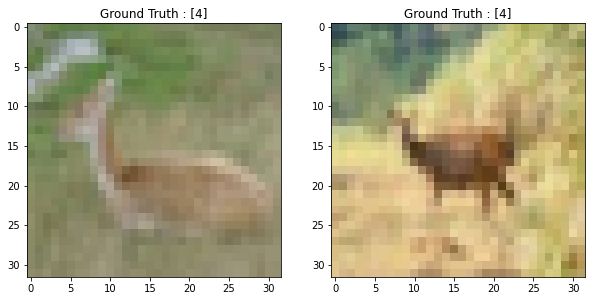

In [ ]:
data_point = 130

plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[data_point]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[data_point]))

## Reshape needed

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train.shape[0]

50000

In [ ]:
X_train.shape[1]

32

In [ ]:
X_train.shape[2]

32

In [ ]:
X_test.shape

(10000, 32, 32, 3)

## View the shape

In [ ]:
print('Training data shape : ', X_train.shape, Y_train.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)


In [ ]:
print('Testing data shape : ', X_test.shape, Y_test.shape)

Testing data shape :  (10000, 32, 32, 3) (10000, 1)


## Take a look at a single image

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

#Task: do all preprocessing here

The data is obtained as a training and testing set. Typically, it's a good idea to create a validation set from the training set. Hint: previous pracs illustrated how to do this. Name the validation data as `X_val` and `Y_val`.

All other preprocessing including normalisation, one-hot encoding etc should be added here...

## What is the min/max for this image?

In [ ]:
np.max(X_train[0])

255

In [ ]:
np.min(X_train[0])

0

## Normalise


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

## Take a look at a single image (after normalisation)

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## What is the min/max for this image after normalisation?

In [ ]:
np.max(X_train[0])

1.0

In [ ]:
np.min(X_train[0])

0.0

## One hot encoding

## Before

In [ ]:
Y_test[0]

array([3], dtype=uint8)

## Convert from categorical labels to one-hot encoded vectors

In [ ]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
num_classes = 10

## After

In [ ]:
Y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3)

## Create a convolutional neural network

Your network must get at least 70% accuracy on the test set.

Your model must have less than 600,000 weights in total.

Hint: try first with no dropout, then add dropout - what happens, is it bettter or worse?

Hint: try small batch size

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(filters=84, kernel_size=2, activation='relu', input_shape=(32,32,3))) 
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=110, kernel_size=2, padding='same', activation='relu')) 
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')) 
    model.add(MaxPool2D(pool_size=3))
    model.add(Flatten())
    model.add(Dense(612, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    loss = CategoricalCrossentropy()  
    # Compile the model
    model.compile(loss=loss,
             optimizer='adam',
             metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()

## Determine the number of trainable parameters

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 84)        1092      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 84)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 110)       37070     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 110)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         56448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
checkpoint_path = "training/cp-{epoch:04d}.ckpt"

cp_callback = ModelCheckpoint(filepath=checkpoint_path, 
                              save_best_only=True, 
                              save_weights_only=True, 
                              verbose=1)

## Train the model

## Begin training

In [ ]:
history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=100, verbose=1, callbacks=[cp_callback])

Epoch 1/10
347/350 [============================>.] - ETA: 0s - loss: 1.7463 - accuracy: 0.3529
Epoch 00001: val_loss improved from inf to 1.44398, saving model to training/cp-0001.ckpt
350/350 [==============================] - 22s 17ms/step - loss: 1.7442 - accuracy: 0.3538 - val_loss: 1.4440 - val_accuracy: 0.4627
Epoch 2/10
348/350 [============================>.] - ETA: 0s - loss: 1.3422 - accuracy: 0.5147
Epoch 00002: val_loss improved from 1.44398 to 1.16388, saving model to training/cp-0002.ckpt
350/350 [==============================] - 5s 13ms/step - loss: 1.3421 - accuracy: 0.5147 - val_loss: 1.1639 - val_accuracy: 0.5842
Epoch 3/10
345/350 [============================>.] - ETA: 0s - loss: 1.1674 - accuracy: 0.5836
Epoch 00003: val_loss improved from 1.16388 to 1.11735, saving model to training/cp-0003.ckpt
350/350 [==============================] - 4s 11ms/step - loss: 1.1662 - accuracy: 0.5838 - val_loss: 1.1173 - val_accuracy: 0.5957
Epoch 4/10
347/350 [=================

In [ ]:
correct_values = np.argmax(Y_test,axis=1)

## Plot the performance

Plot the training and validation accuracy in a single plot

In [ ]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

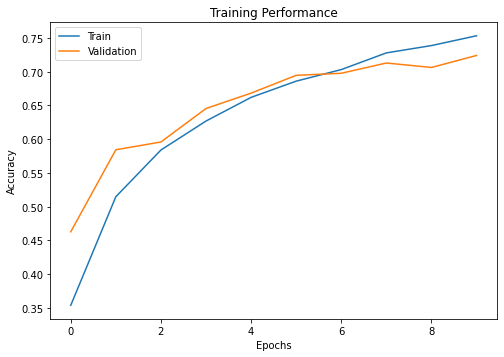

In [ ]:
plot_hist(history.history, xsize=8, ysize=12)

## Compute the accuracy

Get at least 65% testing accuracy

In [ ]:
# New random initialisation
model = baseline_model()
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)
accuracy_score(predictions,correct_values)*100

12.23

In [ ]:
# Load a trained model from one of the checkpoints
model = baseline_model()
model.load_weights("training/cp-0010.ckpt")
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)
accuracy_score(predictions,correct_values)*100

71.73

## Predict on the test data

## Predict on one example

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.00264642, 0.00127413, 0.01097703, 0.52805316, 0.00548212,
        0.09224768, 0.34305683, 0.00094376, 0.01421464, 0.00110425]],
      dtype=float32)

## Predicting, but obtaining the probabilities

In [ ]:
prediction = model.predict(np.expand_dims(X_test[0], axis=0))
np.argmax(prediction, axis=-1)

array([3])

## Predict on all the test data

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)

In [ ]:
predictions[0:10]

array([3, 1, 8, 0, 6, 6, 9, 2, 3, 9])

## Obtain the confusion matrix

In [ ]:
confusion_matrix(predictions,correct_values)

array([[759,  12,  67,  20,  23,  14,   7,  11,  45,  26],
       [ 18, 807,   6,  16,   7,   7,   5,   7,  38,  48],
       [ 35,   3, 649,  99,  88,  89,  56,  45,   8,   8],
       [ 13,   1,  51, 521,  40, 239,  23,  51,   9,   4],
       [ 13,   1,  54,  61, 656,  54,  15,  75,   6,   2],
       [  1,   3,  36,  69,  10, 478,   7,  23,   1,   3],
       [  7,   8,  73, 129,  81,  40, 860,  18,   5,   5],
       [  9,   1,  21,  24,  68,  44,   6, 717,   3,   5],
       [ 83,  30,  21,  24,  14,  11,   8,   4, 852,  25],
       [ 62, 134,  22,  37,  13,  24,  13,  49,  33, 874]])

In [ ]:
prediction_classes = np.argmax(prediction, axis=1)